### LUMS CES - DATA LEADERS PROJECT - COUNTRY-WISE LADDER SCORE PREDICTION

AUTHORED & SUBMITTED BY:
1. UMER QAISER
2. TALHA TARIQ

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model = LinearRegression()

df = pd.read_csv('DS\DataSet for 2021.csv')

##### INPUT DATA OBTAINED FROM KAGGLE

In [97]:
df_cleansed = df.drop(['Standard error of ladder score','lowerwhisker', 'upperwhisker'], axis=1)

df_cleansed = df_cleansed.drop(df_cleansed.columns[10:17], axis=1)
df_cleansed.dropna()

df_cleansed

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Happiness Indicator
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.0
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.0
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.0
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.0
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338,2.43,0.0
...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.5
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,0.5
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.5
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.5


##### STATISTICAL EVALUATIONS

In [98]:
df_cleansed.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Happiness Indicator
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.187919
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.269362
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.000000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,0.000000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,0.500000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.000000


##### SORTING DATA SETS

In [62]:
df_cleansed.sort_values(by=["Country name"],axis=0,ascending=True)

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Happiness Indicator
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.5
92,Albania,Central and Eastern Europe,5.117,9.520,0.697,68.999,0.785,-0.030,0.901,2.43,0.0
108,Algeria,Middle East and North Africa,4.887,9.342,0.802,66.005,0.480,-0.067,0.752,2.43,0.5
56,Argentina,Latin America and Caribbean,5.929,9.962,0.898,69.000,0.828,-0.182,0.834,2.43,0.0
85,Armenia,Commonwealth of Independent States,5.283,9.487,0.799,67.055,0.825,-0.168,0.629,2.43,0.0
...,...,...,...,...,...,...,...,...,...,...,...
106,Venezuela,Latin America and Caribbean,4.892,9.073,0.861,66.700,0.615,-0.169,0.827,2.43,0.5
78,Vietnam,Southeast Asia,5.411,8.973,0.850,68.034,0.940,-0.098,0.796,2.43,0.0
140,Yemen,Middle East and North Africa,3.658,7.578,0.832,57.122,0.602,-0.147,0.800,2.43,0.5
136,Zambia,Sub-Saharan Africa,4.073,8.145,0.708,55.809,0.782,0.061,0.823,2.43,0.5


##### BOX-WHISKER DIAGRAM

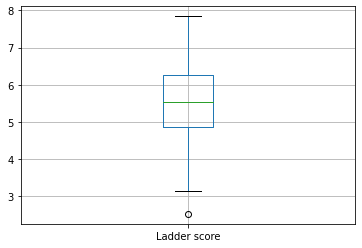

In [63]:
df_cleansed.boxplot("Ladder score")

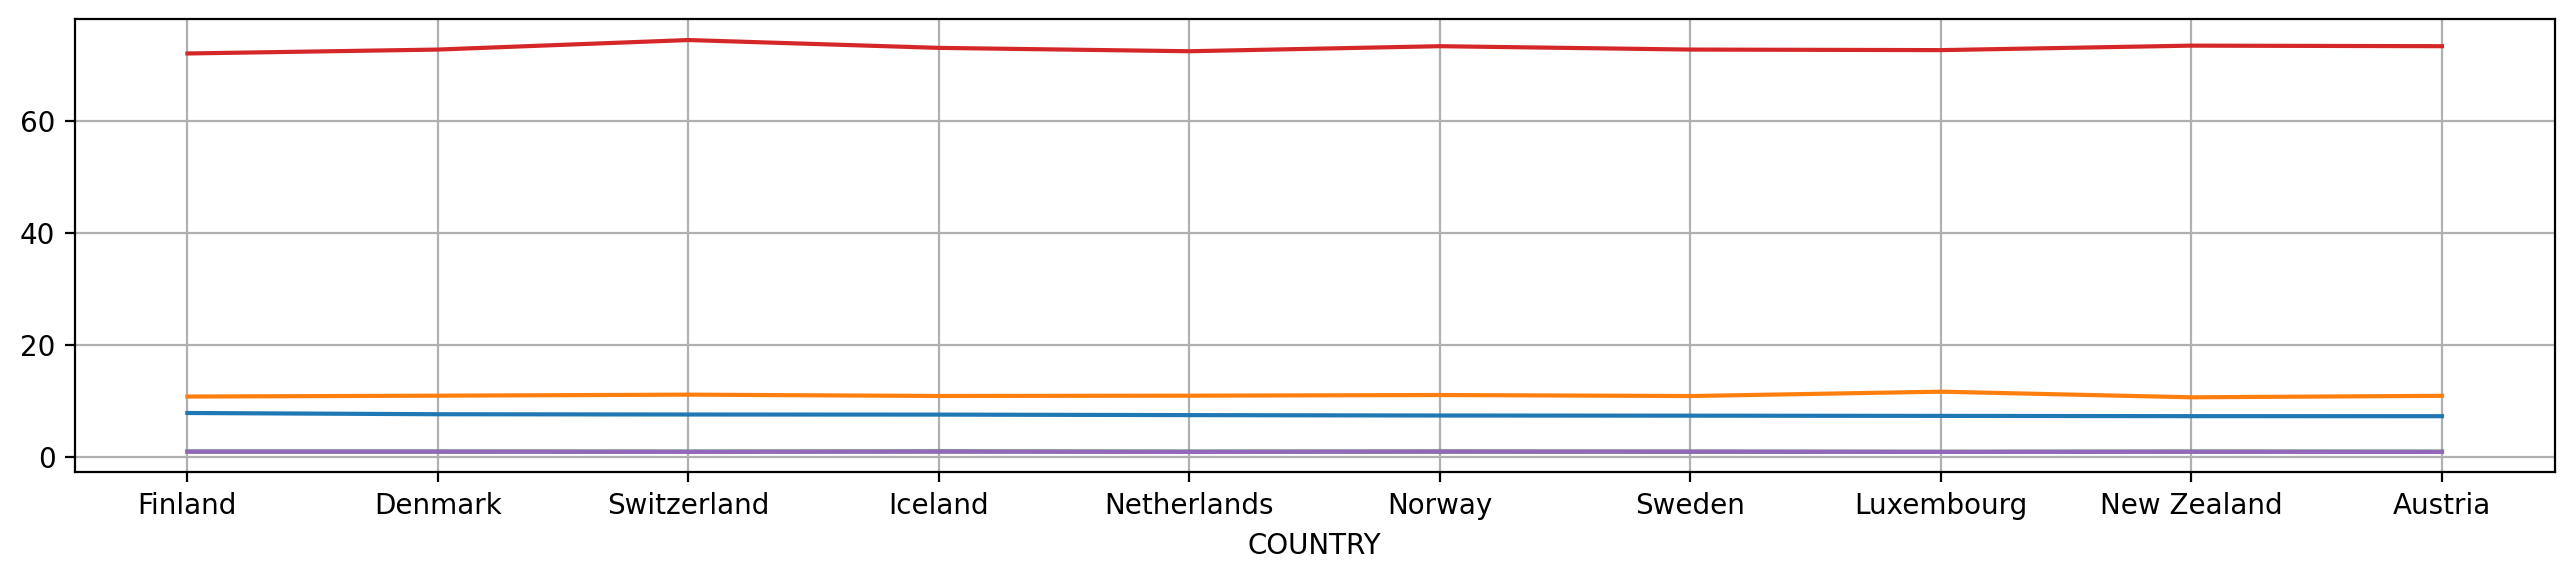

In [105]:
plt.figure(figsize=(16, 3),dpi=200)

plt.xlabel("COUNTRY")
plt.plot(df_cleansed["Country name"].head(10), df_cleansed[["Ladder score", "Logged GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices"]].head(10))
#plt.legend(loc='upper left')
plt.grid()

##### STATISTICAL EVALUATIONS

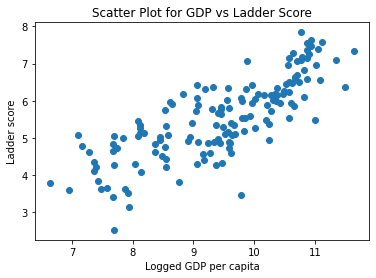

In [65]:
x = df_cleansed["Logged GDP per capita"]
y = df_cleansed["Ladder score"]

plt.title("Scatter Plot for GDP vs Ladder Score")
plt.xlabel("Logged GDP per capita")
plt.ylabel("Ladder score")
plt.scatter(x, y)

##### LADDER SCORE OF TOP 10 COUNTRIES

<BarContainer object of 10 artists>

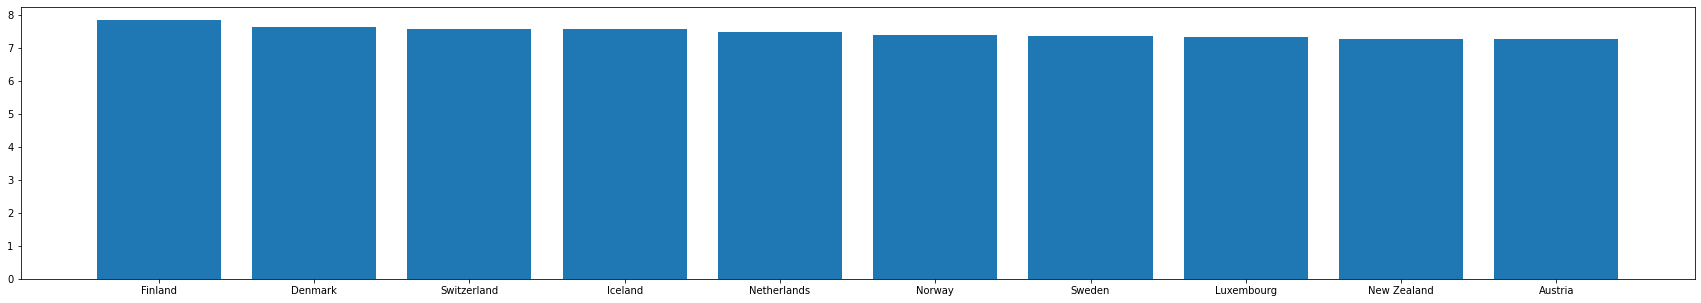

In [66]:
plt.figure(figsize=(30, 5))
plt.bar(df_cleansed["Country name"].head(10), df_cleansed["Ladder score"].head(10))

(array([ 5.,  7., 12., 14., 13., 13., 36., 18., 26.,  5.]),
 array([48.478 , 51.3255, 54.173 , 57.0205, 59.868 , 62.7155, 65.563 ,
        68.4105, 71.258 , 74.1055, 76.953 ]),
 <a list of 10 Patch objects>)

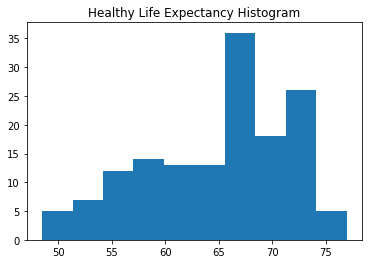

In [91]:
x = df_cleansed["Healthy life expectancy"]

plt.title("Healthy Life Expectancy Histogram")
plt.hist(x)

##### SOCIAL VS LADDER SCORE SCATTER PLOT

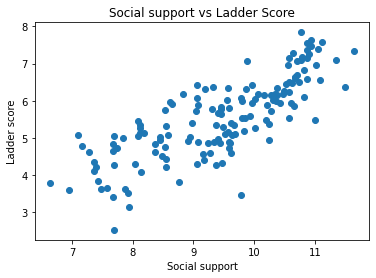

In [84]:
X = df_cleansed["Social support"]
y = df_cleansed["Ladder score"]

plt.title("Social support vs Ladder Score")
plt.xlabel("Social support")
plt.ylabel("Ladder score")
plt.scatter(x, y)

##### LINEAR REGRESSION

In [67]:
from sklearn import metrics

In [109]:
X = df_cleansed.drop(["Ladder score", "Country name", "Regional indicator"], axis=1)
y = df_cleansed["Ladder score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

model = LinearRegression()

#training
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
#first row from the Test Set
X_test.head(1)

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Happiness Indicator
133,8.542,0.795,57.161,0.561,-0.106,0.731,2.43,0.5


##### PREDICTION

In [114]:
#prediction
model.predict(X_test.head(1))

array([4.48214735])

##### MODEL SCORE

In [69]:
#evaluation
model.score(X_test, y_test)

0.8047203843368813